In [1]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("forecast")
library(forecast)
install.packages("glmnet")
library(glmnet)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# Leer el archivo CSV desde la URL
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
df <- read_csv(url, show_col_types = FALSE)

In [14]:
head(df,5)

Equipment,Operation,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours,Time_Since_Last_Preventive_Maintenance,Days_Between_Failures,Cumulative_Failure_Count,Average_Repair_Time,Cumulative_Maintenance_Cost
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,SEWP012,SEWF008,SEWC082,SEWA083,2023-01-03,0.17,51.00,0.17,0,2,1,1.0138017,51.00
1013453,TOP STITCH,VC2713,SEWP002,SEWF001,SEWC001,SEWA001,2023-01-03,1.00,19.20,1.00,0,2,1,1.0130000,19.20
1027243,SET SLEEVE,VC2700,SEWP002,SEWF009,SEWC100,SEWA095,2023-01-03,0.50,60.69,0.50,0,2,1,0.6470370,60.69
1027509,HEM AROUND,VC2711,SEWP001,SEWF001,SEWC001,SEWA001,2023-01-03,0.17,75.00,0.17,0,2,1,0.6990909,75.00
1030654,FLAT LOCK,FD62,SEWP001,SEWF001,SEWC014,SEWA004,2023-01-03,0.17,26.00,0.17,0,2,1,0.6375000,26.00


In [30]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(Operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

Operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,12993,12993,0.1700588
HEM BOTTOM,9841,22834,0.2988626
JOIN PANEL,5076,27910,0.3652998
TAPE SHOULDER,3547,31457,0.4117247
HEM AROUND,3279,34736,0.4546418
ATTACH ELASTIC,2931,37667,0.4930042
SET SLEEVE,2844,40511,0.5302279
JOIN SHOULDER,2716,43227,0.5657762
FLAT LOCK,2711,45938,0.6012591


In [3]:
# Convertir la columna 'Date' al formato adecuado
df$Date <- as.Date(df$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(Date)

In [4]:
# Calcular la diferencia en días entre la fecha actual y la fecha del último mantenimiento preventivo registrado para cada equipo
df <- df %>%
  group_by(Equipment) %>%
  mutate(Time_Since_Last_Preventive_Maintenance = ifelse(`WO Type` == "Preventative Maintenance", difftime(max(Date), Date, units = "days"), 0))

In [5]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`WO Type` == "Corrective Maintenance")

In [6]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(Equipment) %>%
  mutate(Days_Between_Failures = difftime(Date, lag(Date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$Date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [7]:
df <- df %>%
  group_by(Equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [8]:
# Calcular el promedio de tiempo de reparación
df <- df %>%
  group_by(Equipment) %>%
  mutate(Average_Repair_Time = mean(repairHours, na.rm = TRUE))

In [9]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(Equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(partsCost))

In [10]:
# Inicializar y ajustar el modelo de regresión lineal
df <- select(df, -`WO Type`)
# Convertir la variable Days_Between_Failures a tipo de datos numérico
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures)

In [15]:
head(df,5)

Equipment,Operation,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours,Time_Since_Last_Preventive_Maintenance,Days_Between_Failures,Cumulative_Failure_Count,Average_Repair_Time,Cumulative_Maintenance_Cost
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,SEWP012,SEWF008,SEWC082,SEWA083,2023-01-03,0.17,51.00,0.17,0,2,1,1.0138017,51.00
1013453,TOP STITCH,VC2713,SEWP002,SEWF001,SEWC001,SEWA001,2023-01-03,1.00,19.20,1.00,0,2,1,1.0130000,19.20
1027243,SET SLEEVE,VC2700,SEWP002,SEWF009,SEWC100,SEWA095,2023-01-03,0.50,60.69,0.50,0,2,1,0.6470370,60.69
1027509,HEM AROUND,VC2711,SEWP001,SEWF001,SEWC001,SEWA001,2023-01-03,0.17,75.00,0.17,0,2,1,0.6990909,75.00
1030654,FLAT LOCK,FD62,SEWP001,SEWF001,SEWC014,SEWA004,2023-01-03,0.17,26.00,0.17,0,2,1,0.6375000,26.00


In [19]:
formula <- as.formula("Days_Between_Failures ~ Equipment + Operation + `Model Base` + `Problem Code` + `Failure Code` +
`Cause Code` + `Action Code` + downtimeGross + partsCost + repairHours + Time_Since_Last_Preventive_Maintenance + Cumulative_Failure_Count + Average_Repair_Time +
Cumulative_Maintenance_Cost")

In [20]:
# Inicializar y ajustar el modelo de regresión lineal
model <- lm(formula = formula, data = df)
# Resumen del modelo
summary(model)


Call:
lm(formula = formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.98  -25.39   -8.94    8.48  476.49 

Coefficients: (10 not defined because of singularities)
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -1.664e+03  3.178e+01 -52.368  < 2e-16
Equipment                                3.670e-06  1.567e-06   2.342 0.019177
OperationATTACH BOW                      2.864e+01  1.389e+01   2.062 0.039164
OperationATTACH ELASTIC                 -4.411e+00  5.553e+00  -0.794 0.427035
OperationBACK NECK                      -2.542e+00  1.608e+01  -0.158 0.874416
OperationBARTACK                         1.665e+01  7.463e+00   2.231 0.025670
OperationBARTACK DRAWCORD                1.226e+01  1.580e+01   0.776 0.437872
OperationBARTACK POCKET                  1.780e+01  1.154e+01   1.543 0.122930
OperationBIMD ARMHOLE                    4.128e+00  5.765e+01   0.072 0.942909
OperationBIND ARM  

In [23]:
# Realizar backward elimination
model_final <- step(model, direction = "backward")
model_final$anova

Start:  AIC=619752.3
Days_Between_Failures ~ Equipment + Operation + `Model Base` + 
    `Problem Code` + `Failure Code` + `Cause Code` + `Action Code` + 
    Date + downtimeGross + partsCost + repairHours + Time_Since_Last_Preventive_Maintenance + 
    Cumulative_Failure_Count + Average_Repair_Time + Cumulative_Maintenance_Cost


Step:  AIC=619752.3
Days_Between_Failures ~ Equipment + Operation + `Model Base` + 
    `Problem Code` + `Failure Code` + `Cause Code` + `Action Code` + 
    Date + downtimeGross + partsCost + repairHours + Cumulative_Failure_Count + 
    Average_Repair_Time + Cumulative_Maintenance_Cost

                               Df Sum of Sq       RSS    AIC
- `Cause Code`                263   1178768 250088348 619587
- `Failure Code`               42    167082 249076661 619720
<none>                                      248909580 619752
- repairHours                   1     11092 248920672 619754
- Equipment                     1     18077 248927657 619756
- Cumulativ

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,75532,248909580,619752.3
- Time_Since_Last_Preventive_Maintenance,0,0.0,75532,248909580,619752.3
- `Cause Code`,263,1178768.4,75795,250088348,619587.3
- `Failure Code`,42,178710.4,75837,250267058,619557.9


In [26]:
formula2 = as.formula("Days_Between_Failures ~  Operation + `Model Base` +
    `Problem Code` + `Action Code` + downtimeGross +
    repairHours + Cumulative_Failure_Count + Average_Repair_Time +
    Cumulative_Maintenance_Cost")

In [27]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- lm(formula = formula2, data = df)
# Resumen del modelo
summary(model2)


Call:
lm(formula = formula2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-207.03  -25.54   -9.09    8.30  476.61 

Coefficients: (4 not defined because of singularities)
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -1.667e+03  3.157e+01 -52.788  < 2e-16
OperationATTACH BOW                      3.058e+01  1.383e+01   2.211 0.027034
OperationATTACH ELASTIC                 -2.534e+00  5.517e+00  -0.459 0.646066
OperationBACK NECK                      -1.509e+00  1.608e+01  -0.094 0.925218
OperationBARTACK                         1.858e+01  7.440e+00   2.497 0.012518
OperationBARTACK DRAWCORD                1.343e+01  1.579e+01   0.850 0.395120
OperationBARTACK POCKET                  2.019e+01  1.153e+01   1.751 0.079933
OperationBIMD ARMHOLE                    5.624e+00  5.769e+01   0.097 0.922339
OperationBIND ARM                        1.133e+01  5.894e+00   1.922 0.054600
OperationBIND ARMHO

In [ ]:
# Convertir el dataframe a matriz
X <- as.matrix(df[, -which(names(df) == "Days_Between_Failures")])
y <- df$Days_Between_Failures

# Ajustar el modelo de regresión de Lasso
lasso_model <- cv.glmnet(X, y, alpha = 1)

# Ajustar el modelo de regresión de Ridge
ridge_model <- cv.glmnet(X, y, alpha = 0)

# Seleccionar el mejor valor de lambda para cada modelo
best_lambda_lasso <- lasso_model$lambda.min
best_lambda_ridge <- ridge_model$lambda.min

# Ajustar los modelos finales con el mejor lambda
lasso_final <- glmnet(X, y, alpha = 1, lambda = best_lambda_lasso)
ridge_final <- glmnet(X, y, alpha = 0, lambda = best_lambda_ridge)


In [52]:
# Ordenar los datos por equipo y fecha
df <- df %>% arrange(Equipment, Date)

# Convertir la columna 'Date' en un objeto de fecha
df$Date <- as.Date(df$Date)

# Filtrar las columnas necesarias
df_filtrado <- df %>% select(Equipment, Date, Days_Between_Failures)

# Crear una lista para almacenar los modelos ARIMA para cada equipo
models <- list()

In [53]:
# Obtener la lista única de equipos
equipments <- unique(df$Equipment)

# Ajustar un modelo ARIMA para cada equipo
for (equipment in equipments) {
  # Filtrar los datos para el equipo actual
  df_equipment <- df_filtrado %>% filter(Equipment == equipment)

  # Crear la serie temporal
  ts_data <- ts(df_equipment$Days_Between_Failures, frequency = 1)

  # Ajustar el modelo ARIMA
  fit <- auto.arima(ts_data)

  # Almacenar el modelo
  models[[as.character(equipment)]] <- fit
}

In [69]:
# Encuentra el índice del valor si está presente en el vector
indice_equipo <- which(equipments == 1159763)
indice_equipo

[1] 5838

In [70]:
# Ver el modelo ajustado para un equipo específico (por ejemplo, el primero)
equipment_example <- equipments[5838]
print(models[[as.character(equipment_example)]])

Series: ts_data 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.0255  2.6496
s.e.  0.0731  0.2508

sigma^2 = 12.01:  log likelihood = -528.69
AIC=1063.39   AICc=1063.51   BIC=1073.27


    Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
200       2.607559 -1.833670 7.048787 -4.184714 9.399832
201       2.648575 -1.794099 7.091249 -4.145909 9.443058
202       2.649621 -1.793054 7.092296 -4.144864 9.444106
203       2.649648 -1.793027 7.092323 -4.144837 9.444133
204       2.649649 -1.793026 7.092324 -4.144836 9.444134
[1] "MSE: 11.8890522676111"


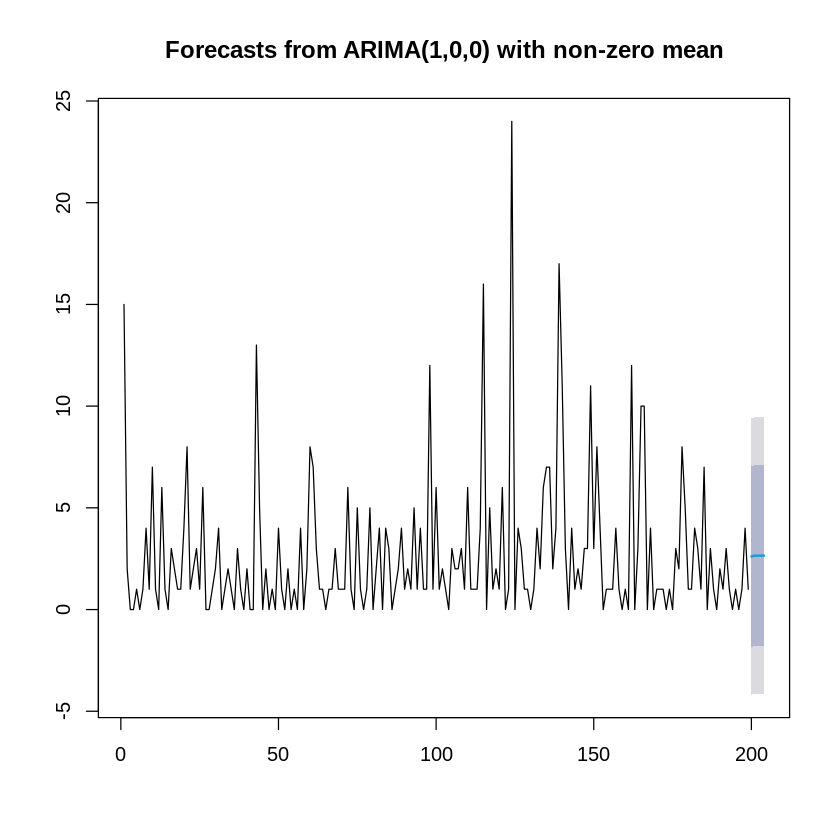

In [71]:
# Hacer una predicción para el equipo específico
forecast_length <- 5  # Número de periodos a predecir
forecast_result <- forecast(models[[as.character(equipment_example)]], h = forecast_length)
print(forecast_result)

# Graficar el resultado de la predicción
plot(forecast_result)

# Evaluar el rendimiento del modelo para un equipo específico
actuals <- df_filtrado %>% filter(Equipment == equipment_example) %>% pull(Days_Between_Failures)
predictions <- fitted(models[[as.character(equipment_example)]])
mse <- mean((actuals - predictions)^2)
print(paste("MSE:", mse))